# A/B Test for an e-commerce website

### The outline of this notebook is as follows:

1. [Understanding the case](#Understandingthecase)
2. [Summary statistics](#Summarystatistics)
3. [Stating the hypothesis](#Statingthenullandalternatehypothesis)
1. [Choosing the sample size](#Choosingthesamplesize)
4. [A/B Test I](##A/BtestI)
5. [A/B Test II](#A/BtestII)
1. [Interpretation and Conclusion](#interpretationandconclusion)

<a id='Understandingthecase'></a>

### I. Understanding the case

Here's the case for our study - 

A medium-sized e-commerce business has a current conversion rate i.e., <b>consumers buying a product</b>, of <b>12%</b>, the firm wants to increase the conversion rate to <b>14%</b>. To help increase the conversion rate, the firm asks the design team to redesign their website. 

As analysts of the e-commerce firm, we need to test the effect of the new website on the conversion rate. The new design of the website will be implemented if the conversion rate rises to <b>14%</b>.

Before rolling out the new design, the firm tests the conversion rate of the new design on a small sample of consumers. An A/B test is implemented for the following data - 

1. id - Unique user ID of the consumer.
2. time - Login time of the consumer.
3. category - 
    - control group - Consumers who are shown the old design of the website.
    - treatment group - Consumers who are shown the new design of the website.
4. page - New page or old page displayed to the consumer.
5. converted - 
    - 1 - User bought a product off the website.
    - 0 - User did not buy a product off the website.


The main goal of this project was to understand the results of an A/B test run by a e-commerce firm and provide statistical and helpful interpretations on the results.


### Importing necessary libraries

In [25]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from IPython.display import display
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16, 6)

<a id='Summarystatistics'></a>

### II. Summary statistics

i) Importing the csv file as a pandas dataset.

In [26]:
df = pd.read_csv('ab_test.csv')

In [27]:
df.rename(columns= {'con_treat': 'category'}, inplace= True)

ii) Displaying the top 5 rows and the number of rows and columns of the dataset.

In [28]:
display(df.head())
df.shape

,id,time,category,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


(294478, 5)

The data contains 294478 rows and 5 columns

iii) Checking the number of null values of the dataset

In [29]:
df.isna().sum()

id           0
time         0
category     0
page         0
converted    0
dtype: int64

There are no null values in the dataset

iv) Checking if the dataset has any non-unique values.

In [30]:
df['id'].nunique() == df['id'].shape

False

There are non-unique values in the dataset.

In [31]:
non_unique_users = df['id'].value_counts()
non_unique_users[non_unique_users > 1].count()


3894

There are 3894 non-unique values in the dataset. Since the non-unique values are low, we remove those values from the dataset.

v) Removing the non-unique values of the dataset.

In [32]:
many_users = non_unique_users[non_unique_users > 1].index
df = df[~df['id'].isin(many_users)]
df.shape[0]

286690

After removing the non-unique values, we get a total of 286690 unique rows in the dataset.

vi) Checking if the 'treatment' rows are aligned with the 'new page' rows. We do this to improve the accuracy of our test.

In [33]:
df[((df['category'] == 'treatment') == (df['page'] == 'new_page')) == False].shape[0]

0

All 'treatment' rows are aligned with the 'new page' rows.

<a id='Statingthenullandalternatehypothesis'></a>

### III. Stating the hypothesis

#### H<sub>0</sub>: A certain e-commerce website visitors that receive the new website design will not have a higher conversion rate compared to visitors that receive the old website design.
#### <center>H<sub>0</sub>: P<sub>0</sub> = P<sub>1</sub></center>

### H<sub>1</sub>: A certain e-commerce website visitors that receive the new website layout will have a higher conversion rate compared to visitors that receive the old website design.
#### <center>H<sub>1</sub>: P<sub>0</sub> ≠ P<sub>1</sub></center>

P<sub>0</sub> represents the conversion rate of old design.

P<sub>1</sub> represents the conversion rate of new design.


We choose a two-tailed test for our experiment and set the confidence interval at 95% i.e.., 

<center>α= 0.05</center>

If the probability of observing a result as extreme or more i.e., <b>p-value</b> is lower than α then we reject the null hypothesis.

This means that we have to be 95% confident that whatever conversion rate we observe of the new design is statistically different from the conversion rate of the old design.


<a id='Choosingthesamplesize'></a>

### IV. Choosing the sample size

i) Calculating the conversion rate for control and treatment groups together.

In [34]:
prob = df['converted'].mean()
prob

0.11944957968537445

The conversion rate for both the groups combined is 11.94%.

ii) Calculating the conversion rate for the control group.

In [35]:
prob_control = df[df['category']=='control']['converted'].mean()
prob_control

0.12017335110577627

The conversion rate for control group is 12.01%

iii) Calculating the conversion rate for the treatment group.

In [36]:
prob_treatment = df[df['category']=='treatment']['converted'].mean()
prob_treatment

0.11872633318688676

The conversion rate for the treatment group is 11.87%. 

The conversion rate of the control group is higher than the conversion rate of the treatment group; but there is no sufficient evidence that the old page is better than the new page, we use A/B test to test this hypothesis.

Since we cannot test our hypothesis on the whole population that visit our website, we need to use a sample number of visitors to test our hypothesis. The more number of samples, the more precise is our result. 

On the contrary, the higher the number of samples, the more expensive our test becomes.

To find the right number of samples we use power analysis. Power is the probability that we will correctly reject the null hypothesis. 

To calculate power we need power of the test (commonly power is 80% or 0.8), alpha (α= 0.05) and effect size(d). We use statsmodel's api to calculate power for us.

In [37]:
import statsmodels.stats.api as sms

effect_size = sms.proportion_effectsize(0.12, 0.14)    

required_sample_size = sms.NormalIndPower().solve_power(effect_size, power= 0.8, alpha= 0.05, ratio= 1)                                   

required_sample_size = round(required_sample_size)                                           

print(required_sample_size)

4432


The required number of samples for each control group and treatment group is 4432. 

<a id='#A/BtestI'></a>
### V. A/B Test I 

#### i) Sampling

To sample the data we use permutation. Permutation is used for random reordering of the entries in an array. We permute 4432 samples using numpy's np.random.permutation.



In [38]:
df_control_permute = df[df['category']=='control']['converted'].iloc[0:4432].values
df_treatment_permute = df[df['category']=='treatment']['converted'].iloc[0:4432].values

df_permute_both = np.concatenate((df_control_permute, df_treatment_permute))

np_test = np.random.permutation(df_permute_both)

df_control_test = np_test[:len(df_control_permute)]
df_treatment_test = np_test[len(df_treatment_permute):]

Permuted control values are stored in df_control_test.

Permuted treatment values are stored in df_treatment_test.

In [39]:
np_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

ii) Interpreting results of permuted data.

The permuted values of both the control and treatment groups are stored as a numpy array in the variable np_test.

In [40]:
len_df_control_test = len(df_control_test)
print('The count of the permuted control values are {}'.format(len_df_control_test))

The count of the permuted control values are 4432


In [41]:
len_df_treatment_test = len(df_treatment_test)
print('The count of the permuted treatment values are {}'.format(len_df_treatment_test))

The count of the permuted treatment values are 4432


In [42]:
print('The conversion rate of the permuted control data is {}'.format(df_control_test.mean()))
print('The conversion rate of the permuted treatment data is {}'.format(df_treatment_test.mean()))

The conversion rate of the permuted control data is 0.12545126353790614
The conversion rate of the permuted treatment data is 0.12184115523465704


As we can see the conversion rate for the treatment group is slightly higher than the control group. We need to test whether it is statistically significant or not.

In [43]:
print('The standard deviation of the permuted control data is {}'.format(df_control_test.std()))
print('The standard deviation of the permuted treatment data is {}'.format(df_treatment_test.std()))

The standard deviation of the permuted control data is 0.33122989601581704
The standard deviation of the permuted treatment data is 0.32710225943233906


iii) Visualising the conversion rate between the control and treatment permuted data.

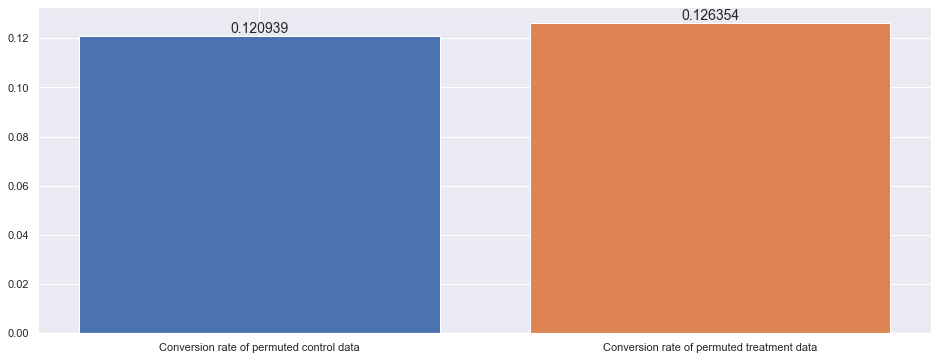

In [44]:
fig, ax = plt.subplots()

plt.bar(x= 'Conversion rate of permuted control data', height= df_control_permute.mean())
plt.bar(x= 'Conversion rate of permuted treatment data', height= df_treatment_permute.mean())
for container in ax.containers:
    ax.bar_label(container, fontsize= 14)
plt.show()

As we can see from the bar plot, the conversion rate of the permuted treatment data is slightly higher than that of the permuted control data.

iv) Z-Test

We finally test and analyse our hypothesis. Since the number of samples is large, we use Z-test to calulate the z-statistic and p-value.

To conduct the Z-test we use statsmodels.stats.proportion.

In [45]:
n_control = len(df_control_permute)
n_treatment = len(df_treatment_permute)

count = [n_control, n_treatment]

result = [df_control_permute.sum(), df_treatment_permute.sum()]

from statsmodels.stats.proportion import proportions_ztest, proportion_confint

z_statistic, p_value = proportions_ztest(result, nobs= count)
(lower_control, lower_treatment), (upper_control, upper_treatment) = proportion_confint(result, nobs= count, alpha=0.05)

print(f'The p-value from Z-test is: {p_value:.3f}')
print(f'The Z-statistic from Z-test is: {z_statistic:.3f}')

The p-value from Z-test is: 0.439
The Z-statistic from Z-test is: -0.774


The p-value we get from the Z-test is 0.439 whereas the Z-statistic is -0.774. We will infer these values in the final section.

<a id='A/BtestII'></a>

### VI. A/B Test II

i) To further strengthen our findings from the Z-test, we simulate differences in the conversion rates between sampled control and sampled treatment groups under the null hypothesis.

To simulate these differences we first sample the data using np.random.choice and find out the difference between the conversion rates of the resampled data. We simulate the data 10000 times to find statistical significance between the control and treatment groups.

In [46]:
len_treatment_permute = len(df_treatment_permute)
len_control_permute = len(df_control_permute)

diff_means_choice = []

for i in range(10000):
    treatment_choice = np.random.choice([0, 1], size= len_treatment_permute, p= [(1- prob), prob])
    control_choice = np.random.choice([0, 1], size= len_control_permute, p= [(1- prob), prob])
    diff_means_choice.append(treatment_choice.mean() - control_choice.mean())

We store the difference of the conversion rate of the resampled control and treatment groups in diff_means_choice list. 

ii) Plotting the distribution

Plotting our simulated conversion differences of the conversion rate gives an idea of the distribution of data. 

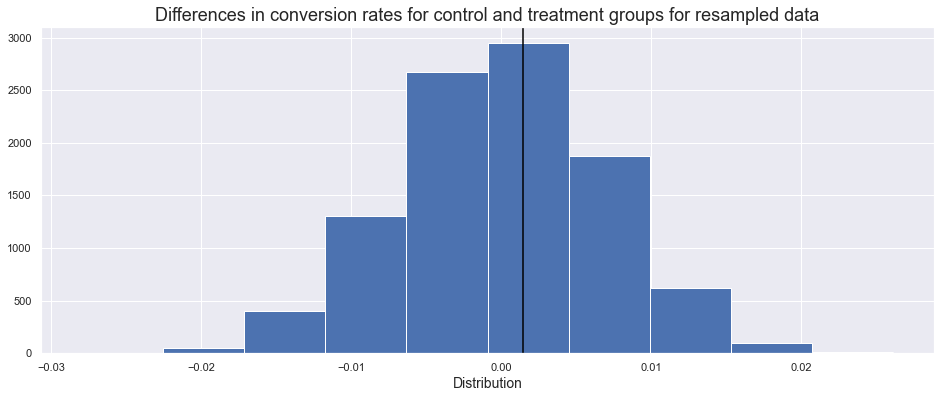

In [47]:
diff_means_old = prob_control - prob_treatment
plt.hist(diff_means_choice, bins= 10)
plt.title('Differences in conversion rates for control and treatment groups for resampled data', fontsize= 18)
plt.xlabel('Distribution', fontsize= 14)
plt.axvline(diff_means_old, color= 'black')

From the plot, we see that the original conversion rate of the control and treatment group is within the range of the simulated conversion rate.

Looking at the distribution is not a precise way to measure statistical significance, hence we calculate p-value.

iv) p-value

The p-value gives the probability of not observing any difference between conversion rates of control and treatment groups if the null hypothesis is true.


In [48]:
diff_means_permute = np.asarray(diff_means_choice)
(diff_means_permute >= diff_means_old).mean()

0.4136

<a id='interpretationandconclusion'> </a>

### VII. Interpretation and conclusion

i) A/B Test I interpretation- 

The Z-statistic represents the number of standard deviations from the mean the original conversion rate i.e., diff_means_old, is. 

The p-value from our Z-test is 0.439 which is way higher than the α= 0.05 threshold we had anticipated. Since <b>p-value>α we fail to reject the null hypothesis.</b>

ii) A/B Test II interpretation-

The p-value derived from A/B Test II confirms our findings of A/B Test I. The p-value of 0.4136 is greater than the alpha of 0.05. Hence we fail to reject our null hypothesis.

iii) Conclusion-

Since we fail to reject the null hypothesis, our new webpage did not perform significantly better than the old webpage. 

Although there could be other variables that influence the decision of the consumers, the analysis so-far has resulted in dropping the new webpage as it does not increase the conversion rate by 2%. 

The conclusion of the whole study is that the firm needs to re-evaluate its decision to roll out the new webpage and further experiment with their designs.